# Topic 4: Behavioral science, “The price of obesity”
# Philip Davis, Lilly Mitchell, Grace Sullivan, James Lawson, Ingrid Frayer

In 1937 George Orwell suggested that “changes of diet” might be more important than “changes of dynasty or even of religion.”Now he is being proved right in a way he might not have expected. Having spent millennia worrying about not having enough food, mankind’s main concern is now eating too much. Having too much toeat seems to be the worstin the United States,home to the highest number of overweight and obese people in the OECD developed countries group. A recentOECD health report projectedthat almost 50% of Americans will be obese by the year 2030. What makes the US so much more obese than other developed countries? 

You have been hired as an intern by a state senator who is leading a subcommittee on obesity prevention. One of the goals of the subcommittee is to slow down the risein obesity rates in the U.S. As a part of the internship, your team will need to locate reliable data on obesity in different countries, and to conduct a rigorous analysis to identify criteria which contribute to obesity levels in the countries which havelow and high obesity rates. What is so special about other OECD countries that make their citizens to be so much thinner? What is the U.S.lacking which makes it more obese than the other countries? You will then translate yourdata into practical policy recommendations for the senator.

##  Part 1: Looking at data as a whole?

Text goes here

In [1]:
#code goes here

In [2]:
#code goes here

## Part 2: Hours Worked Per Week and Population

We can observe that while the overall correlation between hours worked per week and obesity rates is low, for individual countries the correlation tends to be strongly negative. Additionally, if we isolate to the US, we can see that the average hours worked per week has decreased since the 1970's and this increased sedentary lifestyle could be a cause for the rise in obesity. 

Furthermore, we can see that population and obesity rate are very much positively correlated ,and this is true for the individual countries as well. This correlation could be due to worse dietary practices that can be an effect of large populations due to mass production. However, it could just be the case that the both of these factors have been increasing in almost every country in the world recently and there is no causation.

The correlation between hours worked per week and obesity rates for France is: -0.83
The correlation between hours worked per week and obesity rates for Italy is: -0.84
The correlation between hours worked per week and obesity rates for Spain is: -0.85
The correlation between hours worked per week and obesity rates for England is: -0.89
The correlation between hours worked per week and obesity rates for Canada is: -0.95
The correlation between hours worked per week and obesity rates for USA is: -0.84
The correlation between hours worked per week and obesity rates for Korea is: -1.0
The correlation between hours worked per week and obesity rates for Switzerland is: -0.92
The correlation between hours worked per week and obesity rates for Mexico is: -0.67

The overall correlation between hours worked per week and obesity rates is: 0.04


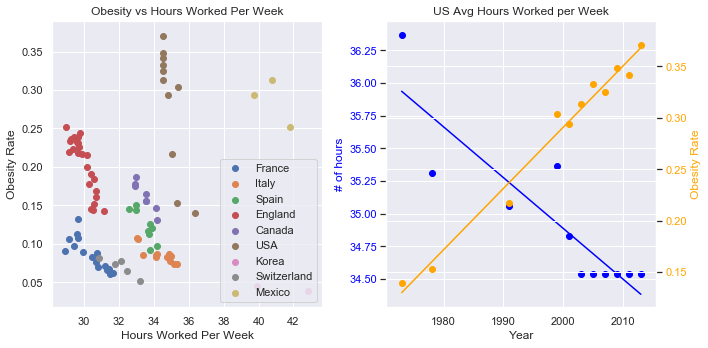

The correlation between population and obesity rates for France is: 0.87
The correlation between population and obesity rates for Italy is: 0.77
The correlation between population and obesity rates for Spain is: 0.73
The correlation between population and obesity rates for Canada is: 0.96
The correlation between population and obesity rates for USA is: 0.82
The correlation between population and obesity rates for Korea is: 1.0
The correlation between population and obesity rates for Switzerland is: 1.0
The correlation between population and obesity rates for Mexico is: 1.0

The overall correlation between hours worked per week and obesity rates is: 0.79


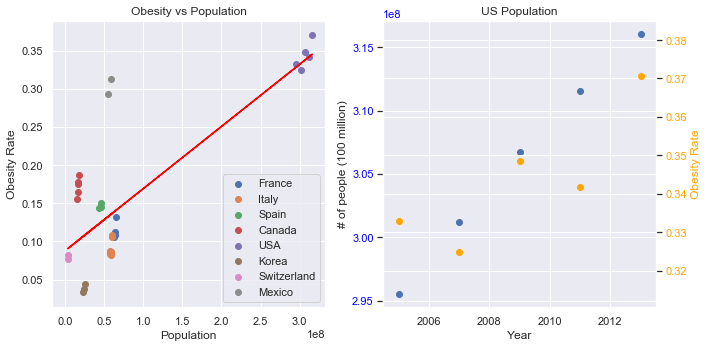

In [58]:
#code goes here
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
#pull data
df = pd.read_csv('obesityHoursWorked.csv')
list1 = ['Country', 'Year', 'Obesity', 'Hours']
list2 = ['Country', 'Year', 'Obesity', 'Population']
#set up dataframes for population and workload
hoursWorkedWeek = df[list1]
population = df[list2]
#adjust annual work hours to weekly to make the data easier to interpret
hoursWorkedWeek = hoursWorkedWeek.dropna()
hoursWorkedWeek.Hours = hoursWorkedWeek.Hours/52
fig, axs = plt.subplots(ncols= 2, figsize = (10,5), sharex = False, sharey = False)
#scatter plot of the work hours and obesity rate for each country
unique_reg=hoursWorkedWeek.Country.unique()
for thing in unique_reg:        
    new_df = hoursWorkedWeek[hoursWorkedWeek.Country==thing]
    #calculate the correlation coefficient between hours and obesity for each country
    corr = np.corrcoef(new_df.Hours, new_df.Obesity)        
    if not np.isnan(corr[0,1]):
        print('The correlation between hours worked per week and obesity rates for ' +thing +' is: '+ str(round(corr[0,1],2)))
    axs[0].scatter(new_df.Hours, new_df.Obesity, label = thing)
#calculate the overall correlation    
corr = np.corrcoef(hoursWorkedWeek.Hours, hoursWorkedWeek.Obesity)
print('\nThe overall correlation between hours worked per week and obesity rates is: '+ str(round(corr[0,1],2)))
axs[0].legend()
axs[0].set_title('Obesity vs Hours Worked Per Week')
axs[0].set_xlabel('Hours Worked Per Week')
axs[0].set_ylabel('Obesity Rate')
#restrict to only USA
uswork = hoursWorkedWeek.Country == 'USA'
usworkR = hoursWorkedWeek[uswork]
#scatter plot of the USA weork hours over time
axs[1].scatter(usworkR.Year, usworkR.Hours, label = 'Work Hours', color = 'blue')
#calculate and plot the line of best fit
usWslope, usWint = np.polyfit(usworkR.Year, usworkR.Hours, 1)
axs[1].plot(usworkR.Year, usworkR.Year*usWslope + usWint, color = 'blue')
axs[1].set_title('US Avg Hours Worked per Week')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('# of hours', color = 'blue')
axs[1].tick_params(axis='y', labelcolor='blue')
axs2 = axs[1].twinx()
axs2.set_ylabel('Obesity Rate', color='orange')
axs2.scatter(usworkR.Year,usworkR.Obesity, label = 'Obesity Rate', color = 'orange')
axs2.tick_params(axis='y', labelcolor='orange')
usOslope, usOint = np.polyfit(usworkR.Year, usworkR.Obesity, 1)
axs2.plot(usworkR.Year, usworkR.Year*usOslope + usOint, color = 'orange')
fig.tight_layout()
plt.show()
#-------------------------------------------------- Now transition to working on population and obesity -------------------------------------------------------------
fig, axs = plt.subplots(ncols= 2, figsize = (10,5), sharex = False, sharey = False)
population = population.dropna()
#scatter plot of the population and obesity rate of each country
unique_reg= population.Country.unique()
for thing in unique_reg:         
    new_df = population[population.Country==thing]
    #calculate the correlation coefficent between population and obesity rate for each country
    corr = np.corrcoef(new_df.Population, new_df.Obesity)        
    if not np.isnan(corr[0,1]):
        print('The correlation between population and obesity rates for ' +thing +' is: '+ str(round(corr[0,1],2)))
    axs[0].scatter(new_df.Population, new_df.Obesity, label = thing)
#calculate and plot the linear regression for the overall population and obesity rates   
popslope, popint = np.polyfit(population.Population, population.Obesity, 1)
axs[0].plot(population.Population, population.Population*popslope + popint, color = 'red')
#calculate the overall correlation between populatin and obesity rate
corr = np.corrcoef(population.Population, population.Obesity)
print('\nThe overall correlation between hours worked per week and obesity rates is: '+ str(round(corr[0,1],2)))
axs[0].legend()
axs[0].set_title('Obesity vs Population')
axs[0].set_xlabel('Population')
axs[0].set_ylabel('Obesity Rate')
#scatter plot of the USA population over time
uspopR = population.Country == 'USA'
uspop = population[uspopR]
axs[1].scatter(uspop.Year, uspop.Population)
axs[1].set_title('US Population')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('# of people (100 million)')
axs[1].tick_params(axis='y', labelcolor='blue')
axs2 = axs[1].twinx()
axs2.set_ylabel('Obesity Rate', color='orange')
axs2.scatter(uspop.Year,uspop.Obesity, label = 'Obesity Rate', color = 'orange')
axs2.tick_params(axis='y', labelcolor='orange')
fig.tight_layout()
plt.show()

Text goes here

##  Part 3: ?

Text goes here 

In [6]:
#code goes here

## Part 4: ?

Text goes here

In [7]:
#code goes here

In [8]:
#code goes here

## Part 5: ?

Text goes here

In [9]:
#code goes here

## Part 6: ?

Text goes here

In [12]:
#code goes here

In [11]:
#code goes here

## Part 7: ?

Text goes here

In [13]:
#code goes here

## Part 8: ?

Text goes here

In [14]:
#code goes here

## Part 9: ?

Text goes here

In [15]:
#code goes here